# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set URLs
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Variables and Lists
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# counters
record = 0
record_set = 1

In [4]:
# Data Retrieval
print("Beginning Data Retrieval ")
print("-----------------------------")

for i, city in enumerate(cities): 

    if (i % 50 == 0 and i >= 50):
        record_set += 1
        record = 0
        
    record += 1
        
    city_url = base_url + "&q=" + city

    try:
        response = requests.get(f"{city_url}").json()
        city_id.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        city_record = response["name"]
        print(f'Processing Record {record} of Set {record_set} | {response["name"]}')
        
    except:
        print(f"City not found. Skipping...")
        
    continue
              
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | Beni Mazar
Processing Record 2 of Set 1 | Hilo
Processing Record 3 of Set 1 | George Town
Processing Record 4 of Set 1 | Avarua
Processing Record 5 of Set 1 | Zonguldak
Processing Record 6 of Set 1 | Punta Arenas
Processing Record 7 of Set 1 | Mataura
City not found. Skipping...
Processing Record 9 of Set 1 | Laguna
Processing Record 10 of Set 1 | Atuona
Processing Record 11 of Set 1 | Northam
Processing Record 12 of Set 1 | Bredasdorp
Processing Record 13 of Set 1 | Barrow
Processing Record 14 of Set 1 | Port Alfred
Processing Record 15 of Set 1 | Ulladulla
Processing Record 16 of Set 1 | Vaini
Processing Record 17 of Set 1 | Sokoni
Processing Record 18 of Set 1 | Albany
Processing Record 19 of Set 1 | Katsuura
Processing Record 20 of Set 1 | Lompoc
Processing Record 21 of Set 1 | Mahébourg
Processing Record 22 of Set 1 | Maceió
Processing Record 23 of Set 1 | Camacha
City not found. Skipping...
Pro

Processing Record 4 of Set 5 | Zemio
Processing Record 5 of Set 5 | Padang
Processing Record 6 of Set 5 | Souillac
Processing Record 7 of Set 5 | Susa
Processing Record 8 of Set 5 | Inírida
City not found. Skipping...
Processing Record 10 of Set 5 | Izumo
Processing Record 11 of Set 5 | Hamilton
Processing Record 12 of Set 5 | Podgornoye
Processing Record 13 of Set 5 | Khatanga
Processing Record 14 of Set 5 | Tevaitoa
Processing Record 15 of Set 5 | Nhulunbuy
Processing Record 16 of Set 5 | Mitsamiouli
Processing Record 17 of Set 5 | Dukat
Processing Record 18 of Set 5 | Dale
Processing Record 19 of Set 5 | Santiago del Estero
Processing Record 20 of Set 5 | Rognan
Processing Record 21 of Set 5 | Victorville
Processing Record 22 of Set 5 | Fes
Processing Record 23 of Set 5 | Yellowknife
Processing Record 24 of Set 5 | Kruisfontein
Processing Record 25 of Set 5 | Coquimbo
Processing Record 26 of Set 5 | Mar del Plata
City not found. Skipping...
Processing Record 28 of Set 5 | Calbuco
Ci

Processing Record 13 of Set 9 | Morgan City
Processing Record 14 of Set 9 | Kaitangata
Processing Record 15 of Set 9 | Leningradskiy
Processing Record 16 of Set 9 | Prince Rupert
Processing Record 17 of Set 9 | Brotas
Processing Record 18 of Set 9 | Hervey Bay
City not found. Skipping...
Processing Record 20 of Set 9 | Micheweni
Processing Record 21 of Set 9 | Birao
Processing Record 22 of Set 9 | Atambua
Processing Record 23 of Set 9 | Kemin
Processing Record 24 of Set 9 | Constitución
Processing Record 25 of Set 9 | San Ignacio Río Muerto
Processing Record 26 of Set 9 | Pangnirtung
Processing Record 27 of Set 9 | Oxford
Processing Record 28 of Set 9 | Moen
Processing Record 29 of Set 9 | Kendari
Processing Record 30 of Set 9 | Chimbote
Processing Record 31 of Set 9 | Umm Kaddadah
Processing Record 32 of Set 9 | Esik
Processing Record 33 of Set 9 | Sinnamary
Processing Record 34 of Set 9 | Vila Franca do Campo
Processing Record 35 of Set 9 | Nouakchott
City not found. Skipping...
Proc

Processing Record 13 of Set 13 | Aquin
Processing Record 14 of Set 13 | Ulaangom
Processing Record 15 of Set 13 | Haimen
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_id,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [6]:
weather_dict.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [7]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Beni Mazar,0,EG,1598743080,57,28.50,30.80,80.37,15.28
1,Hilo,40,US,1598742799,52,19.73,-155.09,87.80,10.29
2,George Town,40,MY,1598742904,94,5.41,100.34,77.00,3.36
3,Avarua,14,CK,1598743051,73,-21.21,-159.78,77.00,17.22
4,Zonguldak,0,TR,1598743081,38,41.25,31.83,68.59,4.56
...,...,...,...,...,...,...,...,...,...
555,Sorong,100,ID,1598743198,85,-0.88,131.25,76.95,7.96
556,Ouadda,100,CF,1598743199,96,8.08,22.40,68.00,4.81
557,Aquin,47,HT,1598743199,80,18.28,-73.40,82.65,2.57
558,Ulaangom,91,MN,1598743199,64,49.98,92.07,51.35,1.95


In [8]:
weather_dict.to_csv("output_data.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

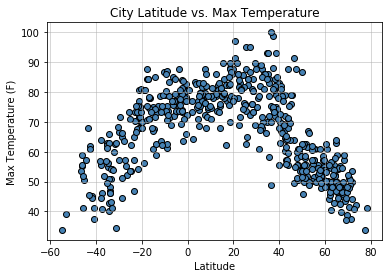

In [9]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../images/Latitude vs Temperature.png")

## Latitude vs. Humidity Plot

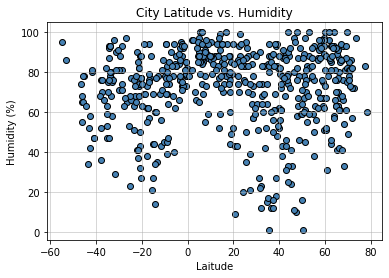

In [10]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../images/Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

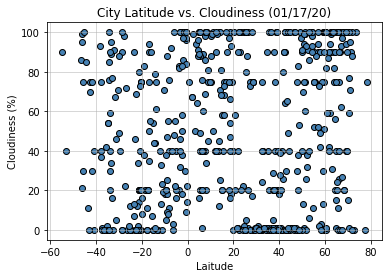

In [11]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../images/Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

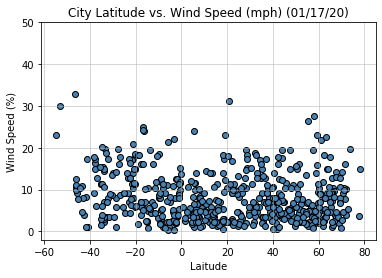

In [12]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../images/Latitude vs Wind Speed.png")

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression = x * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regression, "r-")
    print(f"The R² value is: {round(st.pearsonr(x, y)[0],2)}")
    return regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R² value is: -0.79


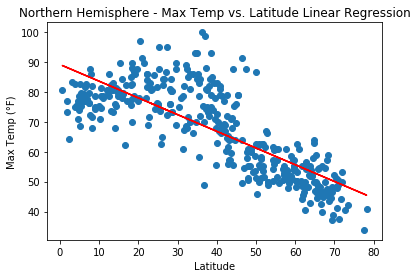

In [21]:
regression = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°F)")
plt.savefig("../images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R² value is: 0.77


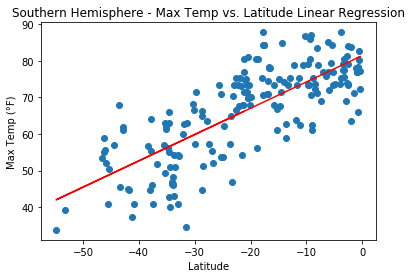

In [22]:
regression = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°F)")
plt.savefig("../images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R² value is: -0.1


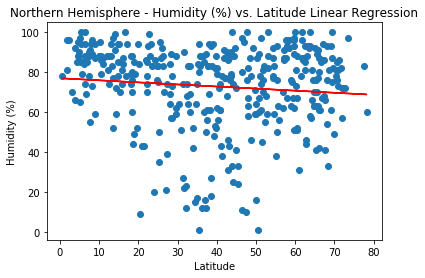

In [23]:
regression = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R² value is: 0.14


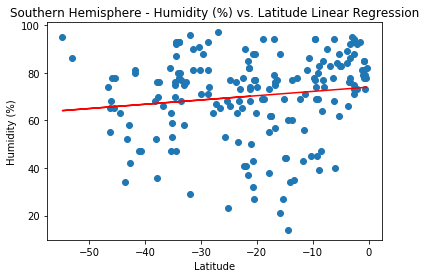

In [24]:
regression = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R² value is: 0.03


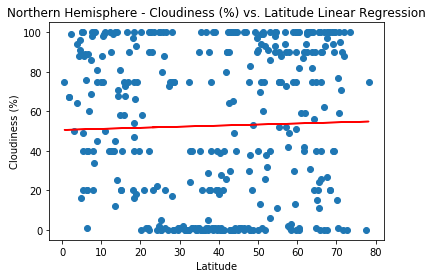

In [25]:
regression = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R² value is: 0.03


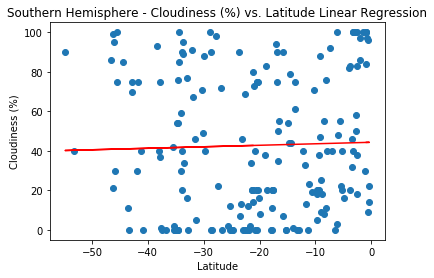

In [26]:
regression = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R² value is: 0.07


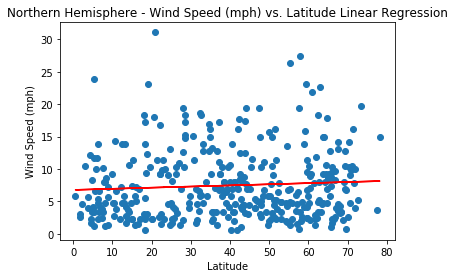

In [27]:
regression = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R² value is: -0.24


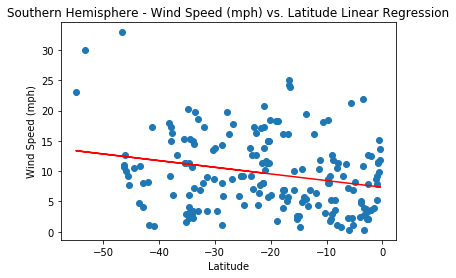

In [28]:
regression = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")